# MNIST DATA SET PREDICTION AND CLASSIFICATION WITH AUTOENCODERS AND CLASSIFIER(MLP)

Author:Moreen Owino

In this project i use two different types of autoencoders i.e A simple basic two layer feedforward autoencoder and a denoising autoencoder as feature extractors for my mnist xtrain and x_test sets and use this lower dimensional output as input to my classifier  together with the y_targets and use that to train my classifier the use the trained model to predict the digit labels of the encoded test set.

**Auto encoders:** 

Autoencoders are a type of neural network that can learn to encode input data into a lower-dimensional representation, and then decode that representation back into the original input data. The goal of an autoencoder is to learn a compressed representation of the input data that captures the most important features and patterns, while discarding the less important details.

The basic architecture of an autoencoder consists of two parts: an encoder and a decoder. The encoder takes in the input data and produces a lower-dimensional representation (also known as a latent code) that captures the essential features of the input. The decoder then takes this representation and produces an output that is as close as possible to the original input.Autoencoders have many practical applications, such as dimensionality reduction, data compression, and image denoising. They can also be used as a generative model to generate new data points that are similar to the original data.

**Multi layer perceptrone(MLP):**

A multi-layer perceptron (MLP) is a type of artificial neural network that is commonly used for supervised learning tasks, such as classification or regression. MLPs consist of multiple layers of interconnected nodes (perceptrons) that process the input data and produce an output.

The input layer of an MLP receives the input data, and each node in the input layer represents a feature of the input. The hidden layers of the MLP perform a series of nonlinear transformations on the input data, with each layer transforming the output of the previous layer. The final layer of the MLP produces the output, which can be either a classification result or a continuous value for regression.Each node in an MLP typically applies a nonlinear activation function to the weighted sum of its inputs. This activation function introduces nonlinearity into the network, allowing it to model complex relationships between the input and output.

### Loading necessary libraries

First i loaded the necessary libraries as shown in the code chunk below.I will not be making any high function calls and will be using mostly numpy and my own built functions for this project.

In [1]:
# loading required libraries

import numpy as np # for doing calculations etc
import pandas as pd # for importing data sets(pd.read_csv)
# %matplotlib inline to display any plots generated directly in the output cell, rather than in a separate window.
%matplotlib inline  
import matplotlib
import matplotlib.pyplot as plt #for plotting digits

### Loading mnist data sets

Next in the code chunkbelow i load in the mnist data sets using pandas and convert them to numpy arrays so that i can be able to use numpy functions to modify them e.g perform calculations etc.

In [2]:
# loading mnist data
xtrain = pd.read_csv('mnist_train.csv')
x_test = pd.read_csv('mnist_test.csv')
y_targets = pd.read_csv('mnist_train_targets.csv')

# converting to numpy arrays
xtrain = xtrain.to_numpy()
x_test = x_test.to_numpy() 
y_targets = y_targets.to_numpy()

### Exploring data(plotting data)

After loading in the data i went ahead an plotted a random digit from the xtrain data set just have an idea of what type of data the training sets contains.To do this i use the matplolib library.we look at a random image i. i use the cmap=plt.cm.binary parameter to display the images in black and white, and use the axis('off') method to remove the axes labels.finaly plt.show is used to display the figure.

[4]


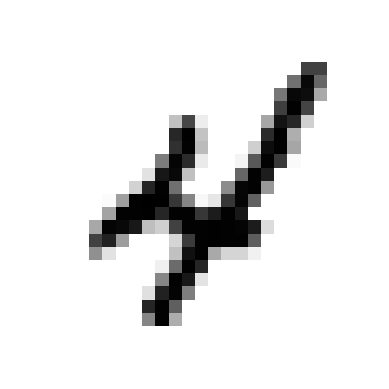

In [3]:
i=7 # choosing a random number and initializing it as i
plt.imshow(xtrain[:,i].reshape(28,28), cmap = plt.cm.binary) # displaying the ith image of the xtrain.
# cmap = plt.cm.binary is used to display the images in black and white

plt.axis("off") # removes the axis labels
plt.show # to display the figure
print(y_targets[i]) # Printing the ith  values of the targer set

## Data Preprocessing


### normalizing the data

The training data and test data contain images that are typically flattened into  one-dimensional arrays of length 784
(28x28=784)pixels.For better perfomance of any model that the data will be used in these pixel values need to be normalized.
To normalize the pixel values to a range between 0 and 1, it is common to divide each element in the 
Xtrain and x_test array  by 255, which is the maximum possible pixel value..Doing this will lead to faster convergence,better weight initialization and improved generalization of the models.
So in the code chunk below i go ahead and divide the arrays by 255 in order to normalize the values

In [4]:
# normalizing data
normalized_xtrain = xtrain/255
normalized_xtest = x_test/255

In [5]:
# Transposing the normalized data to be used in some of the functions(autoencoders)

trans_normalizedxtrain=normalized_xtrain.T
trans_normalizedxtest=normalized_xtest.T

### one-hot encoding the target matrix

I then one-hot encode the MNIST train targets to prepare them for the classification task. The target values are integers
between 0 and 9, representing the actual digit in the corresponding image. If we use these integers as they are, the machine
learning model might interpret them as continuous variables, which could lead to incorrect predictions. One-hot encoding 
converts each integer target value into a binary vector of length equal to the number of classes (i.e., 10 for MNIST). 
Each element of the vector is either 0 or 1, and corresponds to a specific class. The element corresponding to the actual class
is set to 1, while all other elements are set to 0.The one hot conversion is done in the code chunk below.

In [6]:
# One hot encoding the train target values

values=10 # number of unique values or digits
numbers=y_targets.shape[0] # getting the number of rows in the targets matrix

y=y_targets.reshape(1, numbers)
y_new=np.eye(values)[y.astype('int32')] #  uses advanced indexing to create a new array of shape (y.shape[0], values) where, 
# each row is a one-hot encoded representation of the corresponding element in y.

targets=y_new.T.reshape(values, numbers)# Transforming the matrix so that we have the one one hot encoded digit per column.
np.shape(targets) # printing out the shape of targets array

(10, 60000)

 ## First Autoencoder : Simple Feedforward autoencoder
 
 **simple Autoencoder architecture**
 
The autoencoder in the code below is a basic two-layer feedforward autoencoder, also known as a simple autoencoder. It consists of an input layer, one hidden layer (encoder), and an output layer (decoder). The activation function that was used in both layers is the sigmoid function but one is able to choose between relu and sigmoid using the act_f1 and act_f2 arguments.The loss function used is the mean squared error. The autoencoder aims to learn a compressed representation of the input data in the hidden layer and then reconstruct the original data from the compressed representation in the output layer.

It takes in the following arguments: training data set, testset data, hidden_size, learning_rate, batch_size, number of training epochs and act1 and act2 which specify the activation functions in the encoder and decorder(one can choose between relu or sigmoid).

For each training epoch a copy of the training set is shuffled for better training results and this shuffled dataset is passed through a loop that uses mini batch training by dividing the data into batches using the batch_size specified in the arguments and each batch is passed through the encoder and decoder parts and adjusted using the weights, biases and activation functions.The error between the decoder output and the original batch is then calculated  data set is then calculated and this is used in the backward pass.

Here's a breakdown of what's happening in each step of the encoder, decoder and backward pass

**encoder**

*h1 = sigmoid(np.dot(X_batch, W1) + b1)* - This computes the activation of the hidden layer for the current mini-batch using the current weight and bias parameters (W1 and b1) and the sigmoid activation function.

**decoder**

*output = sigmoid(np.dot(h1, W2) + b2)* - This computes the output of the neural network for the current mini-batch using the current weight and bias parameters (W2 and b2) and the sigmoid activation function.

**backward pass**

*error = output - X_batch *- This computes the error between the predicted output and the actual target output for the current mini-batch.

d_output = error * output * (1 - output) - This computes the derivative of the output with respect to the error using the derivative of the sigmoid activation function.

d_h1 = np.dot(d_output, W2.T) * h1 * (1 - h1) - This computes the derivative of the hidden layer activation with respect to the error using the derivative of the sigmoid activation function and the current weight parameters (W2).

d_W2 = np.dot(h1.T, d_output) - This computes the gradient of the error with respect to the weight parameters (W2).

d_b2 = np.sum(d_output, axis=0) - This computes the gradient of the error with respect to the bias parameters (b2).

d_W1 = np.dot(X_batch.T, d_h1) - This computes the gradient of the error with respect to the weight parameters (W1).

d_b1 = np.sum(d_h1, axis=0) - This computes the gradient of the error with respect to the bias parameters (b1).

The updated weight and bias parameters are then computed by subtracting the product of the learning rate and the gradient for each parameter.

These then update the current weight and bias parameters with the newly computed ones for the next iteration.

**validation** -The trainset loss, trainset accuracy, testset loss and testset accuracy are then calculated for each epoch of training.The losses are stored for future plotting.

The original trainset and testset are then passed through the trained encoder that has the weights and biases from the training.

Finally the function returns the **encoded trainset, encoded testset, deoder output for the train set, decoder output for the test set, train_losses, test_losses.**


In [7]:

def simple_autoencoder(xtrainset, xtestset, hidden_size, learning_rate, batch_size, epochs, activation1, activation2):
    # Initialize weights and biases
    W1 = np.random.randn(xtrainset.shape[1], hidden_size) * 0.1
    b1 = np.zeros(hidden_size)
    W2 = np.random.randn(hidden_size, xtrainset.shape[1]) * 0.1
    b2 = np.zeros(xtrainset.shape[1])
    
    # Define sigmoid activation function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    # Define relu activation function
    def relu(x):
        return max(0, x)

    # Define mean squared error loss function
    def mse_loss(y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))
    
    if activation1 == 1:
        act1 = sigmoid
    elif activation1 == 2:
        act1 = relu
        
    if activation2 == 1:
        act2 = sigmoid
    elif activation2 == 2:
        act2 = relu
        
    
    # Initialize empty lists for storing losses
    train_losses = []
    test_losses = []
    
    # Training loop
    for epoch in range(epochs):# specifys the number of iterations to make during training
        
        # making a copy of the xtrainset so that i can shuffle the data for better training results.
        trans_normalizedxtrain_copy = np.copy(xtrainset)
        # Shuffle training data
        np.random.shuffle(trans_normalizedxtrain_copy)
        # Mini-batch training
        # loop below performs mini-batch training by iterating over the shuffled training data in batches of the(batch_size)
        for i in range(0, trans_normalizedxtrain_copy.shape[0], batch_size):
            # Forward pass
            # The code below selects a mini-batch of training samples for the current iteration.
            X_batch = trans_normalizedxtrain_copy[i:i+batch_size]
            
            # Encoder
            h1 = act1(np.dot(X_batch, W1) + b1)
            
            # Decoder
            output =act2(np.dot(h1, W2) + b2)
            
            # Backward pass
            error = output - X_batch
            d_output = error * output * (1 - output)
            d_h1 = np.dot(d_output, W2.T) * h1 * (1 - h1)
            d_W2 = np.dot(h1.T, d_output)
            d_b2 = np.sum(d_output, axis=0)
            d_W1 = np.dot(X_batch.T, d_h1)
            d_b1 = np.sum(d_h1, axis=0)
            # Update weights and biases
            W2_new = W2 - learning_rate * d_W2
            b2_new = b2 - learning_rate * d_b2
            W1_new = W1 - learning_rate * d_W1
            b1_new = b1 - learning_rate * d_b1
            W2 = W2_new
            b2 = b2_new
            W1 = W1_new
            b1 = b1_new
            
        # Calculate loss and accuracy on training set for current epoch
        h2 = act1(np.dot(xtrainset, W1) + b1)
        decodtrain = act2(np.dot(h2, W2) + b2)
        loss_1 = mse_loss(xtrainset, decodtrain)
        accuracy_1 = (1 - loss_1)*100 #calculating the accuracy of reconstructions
        train_losses.append(loss_1) # Store training loss for this epoch
        print("Epoch {0}:train_setLoss = {1:.6f}, Accuracy = {2:.6f}".format(epoch+1, loss_1, accuracy_1))
        
        
        # Validation: using the weights and biases from the autoencoder on the test set
        # Calculate loss and accuracy on test set for current epoch 
        h3 = act1(np.dot(xtestset, W1) + b1)
        decodtest = act2(np.dot(h3, W2) + b2)
        loss_2 = mse_loss(xtestset, decodtest)# calculating the validation loss for the epoch of training.
        accuracy_2 = (1 - loss_2)*100
        test_losses.append(loss_2) # Store validation loss for this epoch
        print("Epoch {0}: testset_loss = {1:.6f}, Accuracy = {2:.6f}".format(epoch+1, loss_2, accuracy_2))
        
            
    # Extract encoded features for train and test set by passing them through the trained encoder
    encod_train = act1(np.dot(xtrainset, W1) + b1)
    encod_test = act1(np.dot(xtestset, W1) + b1) 
    
    return encod_train, encod_test, decodtrain, decodtest, train_losses, test_losses 

### Using the simple_autoencoder function

Below is how you use the simple autoencoder function by just calling the function and passing the arguments.I will first Transpose my xtrain and xtest so that i have a 60000 by 784 matrix and a 10000 by 784 matrix since my autoencoder works with the data in that format.The resulting matrices will be a lower dimensional with only 392 rows each after encoding.This will be the input i'll use in the classifier.

In [8]:

encoder = simple_autoencoder(trans_normalizedxtrain, trans_normalizedxtest, hidden_size=392, learning_rate=0.01, batch_size=256, epochs=10, activation1=1, activation2=1)

Epoch 1:train_setLoss = 0.015568, Accuracy = 98.443241
Epoch 1: testset_loss = 0.015612, Accuracy = 98.438784
Epoch 2:train_setLoss = 0.009714, Accuracy = 99.028584
Epoch 2: testset_loss = 0.009771, Accuracy = 99.022898
Epoch 3:train_setLoss = 0.007661, Accuracy = 99.233908
Epoch 3: testset_loss = 0.007745, Accuracy = 99.225546
Epoch 4:train_setLoss = 0.006767, Accuracy = 99.323270
Epoch 4: testset_loss = 0.006866, Accuracy = 99.313430
Epoch 5:train_setLoss = 0.006007, Accuracy = 99.399289
Epoch 5: testset_loss = 0.006122, Accuracy = 99.387819
Epoch 6:train_setLoss = 0.006030, Accuracy = 99.397024
Epoch 6: testset_loss = 0.006147, Accuracy = 99.385309
Epoch 7:train_setLoss = 0.005376, Accuracy = 99.462438
Epoch 7: testset_loss = 0.005495, Accuracy = 99.450488
Epoch 8:train_setLoss = 0.005155, Accuracy = 99.484500
Epoch 8: testset_loss = 0.005275, Accuracy = 99.472475
Epoch 9:train_setLoss = 0.005108, Accuracy = 99.489220
Epoch 9: testset_loss = 0.005228, Accuracy = 99.477165
Epoch 10:t

### Plotting the training loss and test set loss for cross validation

I then went ahead and plotted the training loss versus the test set loss of the model for cross-validation.The plot is a useful visualization technique for cross-validation and can help to indentify the following:

**Overfitting** The plot can help identify overfitting, which occurs when the model performs well on the training data but poorly on the test data. If the training loss continues to decrease while the test set loss increases, it's an indication of overfitting.

**Model Selection** The plot can also help with model selection by comparing the training and test set losses across different models. If the training loss is low but the test set loss is high, it may indicate that the model is too complex and not generalizing well to new data.

**Hyperparameter Tuning** The plot can also help with hyperparameter tuning by examining the effect of hyperparameters on the training and test set losses. For example, if increasing the regularization parameter reduces overfitting by reducing the gap between training and test set loss, then we can choose the regularization parameter that gives the best test set performance.




In [9]:
# getting the encode_train,encod_test, decodtrain, decodtest, train_losses,and test_losses values from the autoencoder output
encod_train, encod_test, decodtrain, decodtest, train_losses, test_losses = encoder

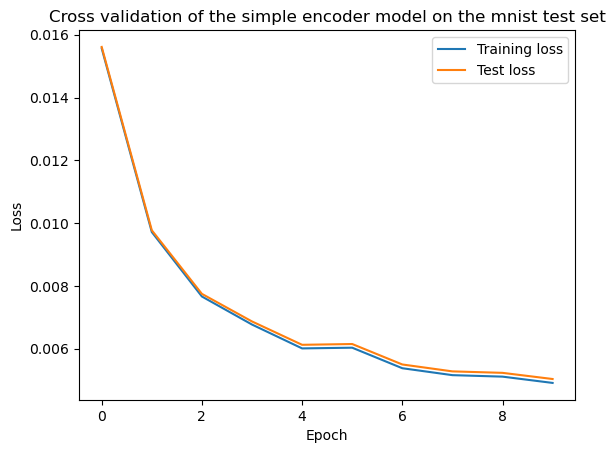

In [10]:
# Plot training and test losses
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Cross validation of the simple encoder model on the mnist test set')
plt.legend()
plt.show()

From plot shows that there is no overfitting occurring during training using the train set since the train set and test set losses are almost the same and it also shows that the hyperparameters have been set correctly and might not need further tuninng.Overrall it shows that the autoencoder is performing well.

### Plotting a range of digits from the original trainset data and comparing that with the decoded digits
Below i plot the same range of digits from the trans_normalizedxtrain which was my input to the autoencoder and digits from decodtrain which is the ouput of the decoder part 

C:\Users\MAURINE\AppData\Local\Temp\ipykernel_7692\2645014168.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)
C:\Users\MAURINE\AppData\Local\Temp\ipykernel_7692\2645014168.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


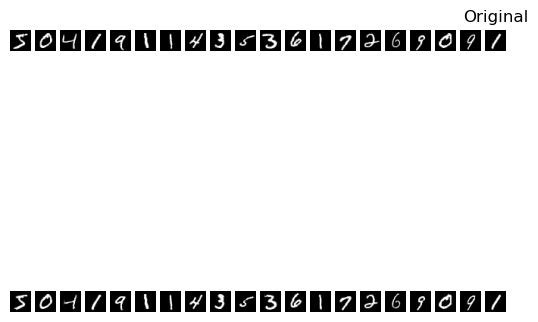

In [11]:
# Printing selected digits from the original X_train data set and the output of the decoder to see whether the reconstructions 
# are accurate or not .

for i in range(20):
    plt.subplot(3, 20, i + 1)
    plt.imshow(trans_normalizedxtrain[i].reshape(28,28), cmap="gray")
    plt.axis("off")
    plt.grid(b=False)
plt.title('Original')    

for i in range(20):
    plt.subplot(3, 20, i + 1 + 40)
    plt.imshow(decodtrain[i].reshape(28,28), cmap="gray")
    plt.axis("off")
    plt.grid(b=False)
  
    
plt.show()

### Plotting a range of digits from the original testset data(validation set) and comparing that with the decoded digits
Below i plot the same range of digits from the trans_normalizedxtest which was my input to the autoencoder and digits from decodtest from the ouput of the decoder

C:\Users\MAURINE\AppData\Local\Temp\ipykernel_7692\2528174394.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)
C:\Users\MAURINE\AppData\Local\Temp\ipykernel_7692\2528174394.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


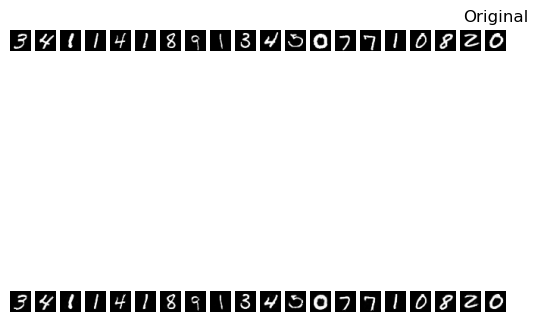

In [12]:
# plotting original test and predicted test digits.
for i in range(20):
    plt.subplot(3, 20, i + 1)
    plt.imshow(trans_normalizedxtest[i].reshape(28,28), cmap="gray")
    plt.axis("off")
    plt.grid(b=False)
plt.title('Original')    

for i in range(20):
    plt.subplot(3, 20, i + 1 + 40)
    plt.imshow(decodtest[i].reshape(28,28), cmap="gray")
    plt.axis("off")
    plt.grid(b=False)
  
    
plt.show()

## Second Autoencoder: Denoising autoencoder

A denoising autoencoder is a type of artificial neural network that is designed to remove noise from input data. It is similar to a regular autoencoder in that it consists of two parts: an encoder and a decoder. The encoder compresses the input data into a lower-dimensional representation, and the decoder reconstructs the original data from the compressed representation.However, unlike a regular autoencoder, a denoising autoencoder is trained to reconstruct data that has been corrupted by noise. During training, the input data is artificially corrupted by adding noise, and the network is trained to reconstruct the original, noise-free data from the corrupted inputs.

By learning to remove noise from the input data, a denoising autoencoder can learn useful features and representations of the data that are robust to noise and can improve the performance of downstream tasks, such as classification.

**DENOISE_AUTOENCODER ARCHITECTURE**

The architecture consists of an input layer, a hidden layer, and an output layer. The input layer and output layer have the same number of nodes, which is equal to the dimensionality of the input data. The hidden layer has a lower number of nodes than the input/output layers, typically referred to as bottleneck layer.

The weights and biases for the neural network are initialized randomly using a normal distribution. The network takes in the noisy input data, which is obtained by adding random noise to the original input data. The network then tries to learn a mapping from the noisy input data to the original, clean input data.

The forward pass of the network consists of multiplying the noisy input data by the first set of weights, adding the first bias, applying the ReLU activation function, multiplying the resulting values by the second set of weights, and finally adding the second bias.

The loss function is defined as the mean squared error between the output of the network and the original input data. The gradients of the loss with respect to the weights and biases are then computed using backpropagation. The weights and biases are updated using the gradients and the learning rate.

The training process iterates over the dataset multiple times, with each iteration being called an epoch. During each epoch, the training data is shuffled and divided into mini-batches to update the weights and biases. The loss is calculated for both the training and test sets to monitor the network's performance during training.

The denoise_autoencoder takes in **testset, testset, hidden_dim, noise_factor, learning_rate, epochs and batch_size=56** as arguments

It then returns the **encodedtrainset , encodedtestset, traning losses and test losses from the trained model*.




In [38]:
def denoise_autoencoder(X_train, X_test, hidden_dim=100, noise_factor=0.2, learning_rate=0.01, epochs=10, batch_size=56):
    input_dim = X_train.shape[1]
    # Define weights
    W1 = np.random.randn(input_dim, hidden_dim)*0.1
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, input_dim)*0.1
    b2 = np.zeros((1, input_dim))
    
    # Define sigmoid activation function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    # Define relu activation function
    def relu(x):
        return max(0, x)
    
    
    loss_test = []
    loss_train = []

    # Training
    for epoch in range(epochs):
        
        X_train_copy = np.copy(X_train)
        # Shuffle the data
        np.random.shuffle(X_train_copy)
        # Mini-batch training
        for i in range(0, X_train_copy.shape[0], batch_size):
            # Get the current mini-batch
            X = X_train_copy[i:i+batch_size]
            # Add noise
            X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape) # Adding noise
            # Forward pass
            hiddenlayer7 = np.dot(X_noisy, W1) + b1
            hiddenlayer8 = sigmoid(hiddenlayer7)  # sigmoid activation
            reconstructed = np.dot(hiddenlayer8, W2) + b2
            # Compute loss and gradients
            loss = np.mean((reconstructed - X)**2)
            grad_reconstructed = 2*(reconstructed - X) / X.shape[0]
            grad_hidden = np.dot(grad_reconstructed, W2.T)
            grad_hidden =sigmoid(hiddenlayer7)*(1 - sigmoid(hiddenlayer7))* grad_hidden  # sigmoid gradient
            # Update weights
            W2 -= learning_rate * np.dot( hiddenlayer8.T, grad_reconstructed)
            b2 -= learning_rate * np.sum(grad_reconstructed, axis=0, keepdims=True)
            W1 -= learning_rate * np.dot(X_noisy.T, grad_hidden)
            b1 -= learning_rate * np.sum(grad_hidden, axis=0, keepdims=True)
            
        # Compute the validation loss at the end of each epoch
        hidden_layer1 = np.dot(X_train, W1) + b1
        hidden_layer2 = sigmoid(hidden_layer1)  # sigmoid activation
        reconstructed1 = np.dot(hidden_layer2, W2) + b2
        training_loss = np.mean((reconstructed1 - X_train)**2)
        accuracy5 = (1-training_loss)*100
        loss_train.append(training_loss) 
        print("Epoch {}: training_loss={:.3f}, accuracy={:.3f}".format(epoch+1, training_loss, accuracy5 ))
        
        hidden_layer3 = np.dot(X_test, W1) + b1
        hidden_layer4 = sigmoid(hidden_layer3)  # sigmoid activation
        reconstructed2 = np.dot(hidden_layer4, W2) + b2
        val_loss = np.mean((reconstructed2 - X_test)**2) #calculting the mse i.e mean squared error
        accuracy6 = (1-val_loss)*100
        loss_test.append(val_loss)
        print("Epoch {}: val_loss={:.3f}, accuracy={:.3f}".format(epoch+1, val_loss, accuracy6 ))
        
    # Extract encoded features for train and test set by passing them through the trained denoise encoder
    denoise_train =  np.dot(X_train, W1) + b1
    denoise_train2 = sigmoid(denoise_train)
    denoise_test = np.dot(X_test, W1) + b1
    denoise_test2 = sigmoid(denoise_test)
    
    # Return the learned weights
    return denoise_train2, denoise_test2 , loss_train, loss_test

### How to use the denoiser function
You call use the function by calling the function and passing the arguments as shown below

In [39]:
denoiser=denoise_autoencoder(trans_normalizedxtrain, trans_normalizedxtest, hidden_dim=392, noise_factor=0.2, learning_rate=0.001, epochs=10, batch_size=128)

Epoch 1: training_loss=0.072, accuracy=92.767
Epoch 1: val_loss=0.072, accuracy=92.761
Epoch 2: training_loss=0.056, accuracy=94.425
Epoch 2: val_loss=0.056, accuracy=94.420
Epoch 3: training_loss=0.050, accuracy=94.950
Epoch 3: val_loss=0.051, accuracy=94.946
Epoch 4: training_loss=0.048, accuracy=95.227
Epoch 4: val_loss=0.048, accuracy=95.223
Epoch 5: training_loss=0.046, accuracy=95.445
Epoch 5: val_loss=0.046, accuracy=95.440
Epoch 6: training_loss=0.044, accuracy=95.635
Epoch 6: val_loss=0.044, accuracy=95.630
Epoch 7: training_loss=0.042, accuracy=95.798
Epoch 7: val_loss=0.042, accuracy=95.791
Epoch 8: training_loss=0.040, accuracy=95.952
Epoch 8: val_loss=0.041, accuracy=95.945
Epoch 9: training_loss=0.039, accuracy=96.086
Epoch 9: val_loss=0.039, accuracy=96.078
Epoch 10: training_loss=0.038, accuracy=96.209
Epoch 10: val_loss=0.038, accuracy=96.202


In [40]:
# getting the denoise_train2, denoise_test2 , loss_train and loss_test values from the autoencoder output
denoise_train2, denoise_test2 , loss_train, loss_test = denoiser

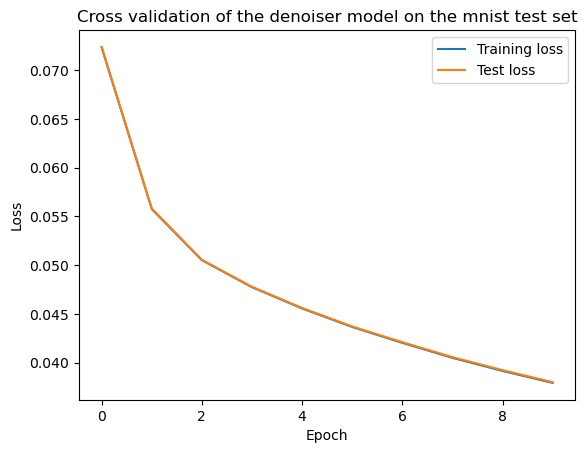

In [41]:
# Plot training and test losses from the denoiser
plt.plot( loss_train, label='Training loss')
plt.plot(loss_test, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Cross validation of the denoiser model on the mnist test set')
plt.legend()
plt.show()

From plot shows that there is no overfitting occurring during training using the train set since the train set and test set losses are almost the same and it also shows that the hyperparameters are ok but maybe further tuning can be done for better results.**I noted that the relu activation function produced poor results for this model and sigmoid was the preferred choice.**

## The classifier / MLP for the encoder outputs

### Defining the classifier architecture

The Multilayer perceptrone has one hidden layer and takes in the **trainset , targets i.e digit labels,  testset, batch_size, learning_rate, input_size, h1_size i.e hidden layer, output_size, actf (activation function) and number of training epochs as arguments**.It uses the sigmoid activation function in the hidden layer and softmax in the output layer as a default(although one can choose to use either relu or sigmoid by using the **actf** argument, actf = 1 is sigmoid and actf = 2 is relu .

The MLP also utilizes mini batch gradient descent because this allows for a good balance between computation time and convergence to the optimal solution.

The **Adam optimizer**  optimization algorithm for stochastic gradient descent (SGD), is used to update the parameters.The gradient of the loss function is estimated using a small batch of training examples at each iteration, rather than using the entire training set as in batch gradient descent. The Adam optimizer adapts the learning rate for each parameter based on the estimated first and second moments of the gradients, which allows it to converge faster and more reliably than traditional stochastic gradient descent methods.

### *Description and explaination of functions utilized within the classifier(MLP)*

**loss function**

When training a neural network, the objective is to minimize the difference between the predicted output of the model and the true output of the input data. This difference is measured by a loss function that calculates the error between the predicted output and the actual output.The loss function is a measure of how well the neural network is performing in its task

The function below was used to measure the loss after each epoch of training.The cross-entropy loss is computed as the negative average log-likelihood over all training samples where the average log-likelihood is computed by dividing the sum of log-likelihoods by the number of training samples.

In [ ]:
# m is the number of samples or instances in the dataset.
# sum_loss calculates the sum of element-wise products of the true output y and the natural logarithm of the predicted output y_hat.
# The negative sign and division by m scales the loss value appropriately.

def loss(y, y_hat):
    sum_loss = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    l = -(1./m) *sum_loss
    
    return l


**forward pass function**

This function performs a feed-forward pass through a one-layer neural network with sigmoid activation function in the hidden layer and softmax activation function in the output layer.

The function takes in three arguments X, Y, and params. X is the input data, Y is the ground truth labels, and params is a dictionary containing the model parameters W1, W2, b1, and b2.The function returns a dictionary cache that contains the intermediate results computed during the feed-forward pass, i.e Z1, A1, Z2, A2, and accuracy.The function code is as shown below

In [ ]:
def forward_pass(X,Y, params):

    cache = {}

    cache["Z1"] = np.matmul(params["W1"], X) + params["b1"]
    cache["A1"] = sigmoid(cache["Z1"])
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)
    cache["accuracy"] = ((Y - cache["A2"])/m) * 100
    print("accuracy {}".format(accuracy))
    return cache

**Backward pass function**

The backward pass function in the code chunk below takes in four arguments X, Y, params, and cache. X is the input data, Y is the ground truth labels, params is a dictionary containing the model parameters W1, W2, b1, and b2, and cache is a dictionary containing the intermediate results computed during the feed-forward pass.The function computes the gradients of the cost function with respect to the model parameters W1, W2, b1, and b2 using backpropagation.
The function first computes the error in the output layer dZ2 then computes the error in the hidden layer dA1 and gradients of each layer.Finally, the function returns a dictionary grads containing the gradients of the cost function with respect to the model parameters W1, W2, b1, and b2.

In [ ]:
def backward_pass(X, Y, params, cache):

    dZ2 = cache["A2"] - Y
    dW2 = (1./m_batch) * np.matmul(dZ2, cache["A1"].T)
    db2 = (1./m_batch) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))
    dW1 = (1./m_batch) * np.matmul(dZ1, X.T)
    db1 = (1./m_batch) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

**Trying out different weight initializations**

Weight initialization is a crucial step in training deep neural networks. The choice of initialization can have a significant impact on the convergence and performance of the model

**Xavier initialization**: This method initializes the weights with random values drawn from a Gaussian distribution with mean 0 and variance 1/n, where n is the number of inputs to the layer. This ensures that the output variance of each neuron remains approximately constant across layers

**He initialization** :He initialization uses a Gaussian distribution with mean 0 and variance 2/n, where n is the number of inputs to the layer. This method is specifically designed for ReLU activation functions, which are commonly used in deep neural networks. The formula used in the code is similar to Xavier initialization, but with a different constant factor of 2.

Both methods aim to initialize the weights such that the gradients flowing through the network during training are neither too large nor too small, which can lead to vanishing or exploding gradients. By choosing an appropriate initialization method, we can ensure stable and efficient training of deep neural networks.









In [ ]:

# Xavier initialization
def xavier_init(n_in, n_out):
    return np.random.randn(n_in, n_out) * np.sqrt(1/(n_in + n_out))
  
W1 = xavier_init(encoded_train.shape[1], hidden_size)
W2 = xavier_init(hidden_size, num_classes)

# He initialization

def he_init(n_in, n_out):
    return np.random.randn(n_in, n_out) * np.sqrt(2/(n_in))


**The train and predict function**

The function takes in train data, target data, test data, batch size, learning rate, input layer size, hidden layer size, output layer size and activation function(actf) as arguments to be used in the training process.It then implements a minibatch gradient descent algorithm with momentum. 
- It first initializes the weights and biases using the Glorot initialization method and then also initializes the adam optimizer variables.These variables are used to keep track of the historical gradients to update the current gradients.
- the different activation functions that can be used in the MLP are then defined
- we then have the forward and backward pass functions as disussed above
- it then sets the momentum parameter to 0.9. This value determines how much of the previous gradient update is incorporated into the current update.
- It the generates the batches and  iterates over the batches in the current epoch going through the forward and backwaard pass, updating the momemntum estimates for each of the four sets of parameters in the neural network and then updates the values of the weights and biases.It does this 9 times and the final values of weights and biases are used to predict the test set using the forward pass.
- It also calculates the loss and accuracy of prediction at each iteration which helps to know whether the model is working properly.
- it finaly returns the values of the predicted test set by using the forward pass function on the test set with the updated parameters.


In [17]:
def train_pred(xtrain, targets, x_test, batch_size, learning_rate, input_size, h1_size, output_size, actf, epochs ):
    import numpy as np
    
    np.random.seed(138)
    
    m = xtrain.shape[1]
    beta = .9
        
    num_batches = -(-m // batch_size) # Calculating the number of batches by dividing the number of columns in the train dataset,
    #by batch_size
    
    
    # initialization of weights and biases:Glorot initialization
    params = { "W1": np.random.randn(h1_size, input_size) * np.sqrt(1. / input_size),
           "b1": np.zeros((h1_size, 1)) * np.sqrt(1. / input_size),
           "W2": np.random.randn(output_size, h1_size) * np.sqrt(1. / h1_size),
           "b2": np.zeros((output_size, 1)) * np.sqrt(1. / h1_size) }
        
    # initialization of the adam optimization variables
    V_dW1 = np.zeros(params["W1"].shape)
    V_db1 = np.zeros(params["b1"].shape)
    V_dW2 = np.zeros(params["W2"].shape)
    V_db2 = np.zeros(params["b2"].shape)
    
    
    # Trying out different types of weight initializations
    
    def he_init(n_in, n_out):
        return np.random.randn(n_in, n_out) * np.sqrt(2/(n_in))

    def xavier_init(n_in, n_out):
        return np.random.randn(n_in, n_out) * np.sqrt(1/(n_in + n_out))
  
    # W1 = xavier_init(encoded_train.shape[1], hidden_size)
    # W2 = xavier_init(hidden_size, num_classes)

    # the activation functions 
    def sigmoid(z):
        h=1./(1. + np.exp(-z))
        return h

    def sigmoid_prime(z):
            return sigmoid(z) * (1 - sigmoid(z))
 
    def softmax(x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / np.sum(exp_x)
 
    def softmax_prime(x):
        s = softmax(x)
        return np.diag(s) - np.outer(s, s)

    def relu(x):
        return max(0, x)

    def relu_prime(x):
        return np.where(x > 0, x, 0)
    
    if actf == 1:
        act_func= sigmoid
        
    if actf == 2:
        act_func = relu
    # the forward and backward pass functions as described previously
        
    def forward_pass(X, params):
        cache = {}

        cache["Z1"] = np.matmul(params["W1"], X) + params["b1"]
        cache["A1"] = act_func(cache["Z1"])
        cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]
        cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)
       
        return cache
    
    def loss(y, y_hat):
        sum_loss = np.sum(np.multiply(y, np.log(y_hat)))
        m = y.shape[1]
        l = -(1./m) *sum_loss
    
        return l

    def backward_pass(X, Y, params, cache):
        dZ2 = cache["A2"] - Y
        dW2 = (1./m_batch) * np.matmul(dZ2, cache["A1"].T)
        db2 = (1./m_batch) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.matmul(params["W2"].T, dZ2)
        dZ1 = dA1 * act_func(cache["Z1"]) * (1 - act_func(cache["Z1"]))
        dW1 = (1./m_batch) * np.matmul(dZ1, X.T)
        db1 = (1./m_batch) * np.sum(dZ1, axis=1, keepdims=True)

        grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

        return grads
        
        
        # training the MLP
        
    for epoch in range(epochs):# setting the number of iterations to make
        permutation = np.random.permutation(xtrain.shape[1]) # shuffling the data once again
        X_train_shuffled = xtrain[:, permutation]
        Y_train_shuffled = targets[:, permutation]
        

        for j in range(num_batches):
            begin = j * batch_size # calculates the beginning index of the current batch
            end = min(begin + batch_size, xtrain.shape[1] - 1) # calculates ending index of the current batch
            X = X_train_shuffled[:, begin:end]
            Y = Y_train_shuffled[:, begin:end]
            m_batch = end - begin # calculates the number of samples in the current batch-used to adjust the learning rate during training

            cache = forward_pass(X, params)
            grads =backward_pass(X, Y, params, cache)
            
            # updating the parameters
            V_dW1 = (beta * V_dW1 + (1. - beta) * grads["dW1"])
            V_db1 = (beta * V_db1 + (1. - beta) * grads["db1"])
            V_dW2 = (beta * V_dW2 + (1. - beta) * grads["dW2"])
            V_db2 = (beta * V_db2 + (1. - beta) * grads["db2"])

            params["W1"] = params["W1"] - learning_rate * V_dW1
            params["b1"] = params["b1"] - learning_rate * V_db1
            params["W2"] = params["W2"] - learning_rate * V_dW2
            params["b2"] = params["b2"] - learning_rate * V_db2

        # printing out the loss at each iteration to monitor the effectiveness of the MLP
        cache = forward_pass(xtrain, params)
        train_cost = loss(targets, cache["A2"])
        y_pred = np.argmax(cache["A2"], axis=0)
        Actual_y = np.argmax(targets, axis=0)
        accuracy = np.mean(y_pred == Actual_y)*100
        print("Epoch {}: training cost = {} : accuracy = {}".format(epoch+1 ,train_cost,accuracy))
        cache = forward_pass(x_test, params)
        
    # Using the foward pass function on the test set to get the predicted values
    cache = forward_pass(x_test, params)    
    predictions = np.argmax(cache["A2"], axis=0)
    return predictions


### *using the model to predict/classify*
You can then call the model and pass the required arguments as shown below and the ouput of the model will be the predictions of the test set data.In this case our train and test sets are encoder outputs from either the denoising autoencoder or the simple feed foward autoencoder

### Using the trained simple feed forward encoder outputs as inputs to classifier
Below i use the encoded train sets and test sets from the trained simple autoencoder as inputs in my classifier

In [19]:
# getting the encode_train,encod_test, decodtrain, decodtest, train_losses,and test_losses values from the autoencoder output
encod_train, encod_test, decodtrain, decodtest, train_losses, test_losses = encoder
# Transposing the values of encod_train and encod_test to fit my classifier
transencod_train=encod_train.T # 392*60,000 matrix
transencod_test=encod_test.T # 392*10,000 matrix

In [20]:
simple_pred = train_pred(transencod_train, targets, transencod_test, batch_size=128, learning_rate=4, input_size=392, h1_size=100, output_size=10, actf=1, epochs=25)

Epoch 1: training cost = 0.17531556138345272 : accuracy = 94.82166666666667
Epoch 2: training cost = 0.1136747375524074 : accuracy = 96.62666666666667
Epoch 3: training cost = 0.09456832233842524 : accuracy = 97.05333333333334
Epoch 4: training cost = 0.06811124154815151 : accuracy = 97.94666666666667
Epoch 5: training cost = 0.05751885870170949 : accuracy = 98.15666666666667
Epoch 6: training cost = 0.044778159379860204 : accuracy = 98.71
Epoch 7: training cost = 0.04517449943804726 : accuracy = 98.54333333333334
Epoch 8: training cost = 0.03208288849785225 : accuracy = 99.08333333333333
Epoch 9: training cost = 0.02881217087728296 : accuracy = 99.14833333333334
Epoch 10: training cost = 0.022028013502515383 : accuracy = 99.48
Epoch 11: training cost = 0.022260359234689327 : accuracy = 99.45
Epoch 12: training cost = 0.015761348301253978 : accuracy = 99.68666666666667
Epoch 13: training cost = 0.015134121626180337 : accuracy = 99.70333333333333
Epoch 14: training cost = 0.011691227761

### Using trained denoiser encoder outputs as inputs to classifier
Below i use the encoded train sets and test sets from the trained denoising autoencoder as inputs in my classifier

In [42]:
# getting the denoise_train2, denoise_test2 , loss_train and loss_test values from the autoencoder output
denoise_train2, denoise_test2 , loss_train, loss_test = denoiser

# transposing the train  and test values to be in the right dimensions for the classifier
transdenoise_train2=denoise_train2.T
transdenoise_test2=denoise_test2.T
transdenoise_train2.shape

(392, 60000)

In [45]:
denoise_pred = train_pred(transdenoise_train2, targets, transdenoise_test2, batch_size=128, learning_rate=4, input_size=392, h1_size=100, output_size=10, actf=1, epochs=23)

Epoch 1: training cost = 1.1029036386366438 : accuracy = 61.806666666666665
Epoch 2: training cost = 1.1838536646884172 : accuracy = 57.37
Epoch 3: training cost = 1.1328178903030743 : accuracy = 60.138333333333335
Epoch 4: training cost = 0.7687470662862725 : accuracy = 74.29166666666667
Epoch 5: training cost = 0.9469707005336544 : accuracy = 70.46
Epoch 6: training cost = 0.7536094591173388 : accuracy = 76.885
Epoch 7: training cost = 1.2499451255928953 : accuracy = 56.18333333333333
Epoch 8: training cost = 0.6756369385489325 : accuracy = 77.99833333333333
Epoch 9: training cost = 0.9379770603125968 : accuracy = 70.13166666666667
Epoch 10: training cost = 1.3265196533838988 : accuracy = 60.91
Epoch 11: training cost = 0.7784642560582995 : accuracy = 76.52
Epoch 12: training cost = 0.723181051646921 : accuracy = 78.24166666666666
Epoch 13: training cost = 1.1149795488143617 : accuracy = 54.79333333333334
Epoch 14: training cost = 1.2231891715789533 : accuracy = 54.98166666666666
Epo

### Using the raw normalized original train data and test data as inputs the classifier

In [46]:
original_pred = train_pred(normalized_xtrain, targets, normalized_xtrain, batch_size=128, learning_rate=4, input_size=784, h1_size=100, output_size=10, actf=1, epochs=25)

Epoch 1: training cost = 0.15146885910247404 : accuracy = 95.37333333333333
Epoch 2: training cost = 0.09569380186933482 : accuracy = 97.08
Epoch 3: training cost = 0.06754380089422206 : accuracy = 97.98666666666666
Epoch 4: training cost = 0.04733426556705319 : accuracy = 98.665
Epoch 5: training cost = 0.03880528797688581 : accuracy = 98.92333333333333
Epoch 6: training cost = 0.03196460881532709 : accuracy = 99.11833333333333
Epoch 7: training cost = 0.028859032874240045 : accuracy = 99.17
Epoch 8: training cost = 0.021173631327661525 : accuracy = 99.49666666666667
Epoch 9: training cost = 0.018129587518789347 : accuracy = 99.565
Epoch 10: training cost = 0.014353414699493772 : accuracy = 99.73333333333333
Epoch 11: training cost = 0.012314067200682422 : accuracy = 99.80499999999999
Epoch 12: training cost = 0.00964279845898397 : accuracy = 99.88166666666667
Epoch 13: training cost = 0.009672397129838733 : accuracy = 99.86166666666666
Epoch 14: training cost = 0.0071003636141519395 

After making the predictions we store the data in a csv file according to the kaggle submission requirements as shown below

In [48]:
# make kaggle submission
df = pd.DataFrame({"Id": range(1, 10001), "Expected": simple_pred}) # insert the correct models predictions
df.to_csv("example_submission66.csv", index=False)

## Discussion 

From the output of the classifier the simple feed forward autoencoder seems to have produced the best output considering that it has a lower dimension than the original data sets.With encoder outputs of 392*60000 and 392*10000 it was able to achieve the same training accuracy of 99.998333 as the original 784*60000 and 784*10000 data sets over the same number of epochs.

The simple feed forward encoder outputs were obtained after only 10 epochs of training which suggests that with more training the results might have been even better than what was observed above.

The output from the denoising encoder which had the same lower dimensions of  392*60000 and 392*10000 did not perform very well and had a training accuracy of about 80% for the same number of epochs.Though this might be because i only trained the autoencoder over 10 epochs and did not give it enough training time so the results might have been better.

The project has showed that autoencoders can indeed be used as feature extractors for machine learning classification problems or for data preparation or denoising , since we see that the outputs of the trained encoders though having lower dimensions are able to achieve similar or maybe even better accuracy than the original data sets. 